<a href="https://colab.research.google.com/github/Abdul-muizz/Abdul-Muizz.github.io/blob/main/30_Training_for_Real_Transfer_Learning_using_DNN_Between_UNB2018_and_USD_IDS201_(Test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchinfo

In [ ]:
import datetime
import pandas as pd
from sklearn import tree
import time
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import preprocessing
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import os
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras import utils as np_utils
# from keras.layers.merge import concatenate
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape
import matplotlib.pyplot as plt

# from keras.layers.wrappers import TimeDistributed

import keras
from sklearn import preprocessing
import tensorflow as tf
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import imblearn
from imblearn.under_sampling import RandomUnderSampler

import random
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import precision_score, recall_score, f1_score
from torchinfo import summary

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
%cd /content/drive/MyDrive
!pwd

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive


In [ ]:
#code to get the paths of files in my drive
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Computer_Organization_Unit_4_JWFILES.pdf
/content/drive/MyDrive/COunit5_JWFILES.pdf
/content/drive/MyDrive/Computer_Organization_Unit_3_JWFILES.pdf
/content/drive/MyDrive/exchangeminmmax.c
/content/drive/MyDrive/KELANI ABDUL MUIZZ OLAMILEKAN ADMISSION LETTER (CSE).jpg
/content/drive/MyDrive/IMG-20170512-WA0020.jpg
/content/drive/MyDrive/ITN_T-hub.rar
/content/drive/MyDrive/The Failure List.pdf
/content/drive/MyDrive/img081.jpg
/content/drive/MyDrive/123.doc
/content/drive/MyDrive/Curriculum Vitae (2).pdf
/content/drive/MyDrive/Curriculum Vitae.pdf
/content/drive/MyDrive/Full page print.pdf
/content/drive/MyDrive/Task_1_Queries.sql
/content/drive/MyDrive/Task_2_Query.sql
/content/drive/MyDrive/Task_3_Query.sql
/content/drive/MyDrive/Task_4_Query.sql
/content/drive/MyDrive/Task_5_conf.txt
/content/drive/MyDrive/Task 1 response 1.ssmssqlproj
/content/drive/MyDrive/Task 1 response 2.ssmssln
/content/drive/MyDrive/Task 2 response.ssmssln
/content/drive/MyDrive/Task 3 

In [ ]:
# dd1= pd.read_csv('/content/drive/MyDrive/CIC-IDS-2018/CIC-IDS-2018-Dataset/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')

In [ ]:
# dd2= pd.read_csv('/content/drive/MyDrive/CIC-IDS-2018/CIC-IDS-2018-Dataset/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')

In [ ]:
# merge_data_2018= pd.concat([dd1,dd2])

In [ ]:
# merge_data_2018.to_csv('merge_data_2018.to_csv', index=False)

In [ ]:
# merge_data_2018.info()

In [ ]:
# print(merge_data_2018.columns)

In [ ]:
# merge_data_2018.describe()

In [ ]:
# de1= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/Hulk-Reqtimeout.csv')

In [ ]:
# de2= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/REGULAR.csv')

In [ ]:
# de3= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-NoDefense.csv')

In [ ]:
# de4= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-Reqtimeout.csv')

In [ ]:
# de5= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-Evasive.csv')

In [ ]:
# merge_data_2021= pd.concat([de1,de2,de3,de4,de5])

In [ ]:
# merge_data_2021.to_csv('merge_data_2021.to_csv', index=False)

In [ ]:
# merge_data_2021.info()

In [ ]:
# merge_data_2021.describe()

In [ ]:
de1= pd.read_csv('/content/drive/MyDrive/CIC-IDS-2018/CIC-IDS-2018-Dataset/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',low_memory=False)
# de2= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/USB-IDS-1-TRAIN.csv')
de3= pd.read_csv('/content/drive/MyDrive/CIC-IDS-2018/CIC-IDS-2018-Dataset/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv', low_memory=False)
# de4= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-Reqtimeout.csv')
# de5= pd.read_csv('/content/drive/MyDrive/USB-IDS Datasets/TCPFlood-Evasive.csv')
merge_data_2018= pd.concat([de1,de3], ignore_index=True)
# Remove the row with "Label" in the "Label" column
merge_data_2018 = merge_data_2018[merge_data_2018['Label'] != 'Label']

# merge_data_2018.to_csv('merge_data_2018.csv', index=False)
# Read your original CSV file
# df = pd.read_csv('merge_data_2018.csv',low_memory=False)

# Define a custom function to sample each group based on the classification label
def custom_sample(name, group):
    if name == 'Benign':
        return group.sample(n=142196, replace=False)
    elif name == 'DoS attacks-GoldenEye':
        return group.sample(n=41508, replace=False)
    elif name == 'FTP-BruteForce':
        return group.sample(n=125744, replace=False)
    elif name == 'SSH-Bruteforce':
        return group.sample(n=50278, replace=False)
    elif name == 'DoS attacks-Slowloris':
        return group.sample(n=10990, replace=False)
    else:
        return group # or apply any other sampling logic for other groups

# Group by the label column (replace 'label' with the actual name of your label column)
grouped = merge_data_2018.groupby('Label', group_keys=False)

# Apply the custom function to each group
Revisedest_2018_df = grouped.apply(lambda group: custom_sample(group.name, group))

# Save the sampled data to a new CSV file
Revisedest_2018_df.to_csv('Revisedest_2018_df.csv', index=False)
e = pd.read_csv('Revisedest_2018_df.csv', low_memory=False)
print(e.shape, e['Label'].value_counts())
print(100 * e['Label'].value_counts(normalize=True))

(370716, 80) Benign                   142196
FTP-BruteForce           125744
SSH-Bruteforce            50278
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64
Benign                   38.357125
FTP-BruteForce           33.919227
SSH-Bruteforce           13.562404
DoS attacks-GoldenEye    11.196711
DoS attacks-Slowloris     2.964533
Name: Label, dtype: float64


In [ ]:
db1 = Revisedest_2018_df
# db1 = pd.read_csv("/content/drive/MyDrive/Revisedest_2018_df.csv")
# db1 = pd.read_csv('/content/drive/MyDrive/CIC-IDS-2018/CIC-IDS-2018-Dataset/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')
db1 = db1[db1['Label'] != 'Label']
# db2 = pd.read_csv('Tuesday-WorkingHours.csv', sep=',')
# db1 = pd.read_csv('/content/drive/MyDrive/Revisedest_2018_df.csv')
del db1['Dst Port'], db1['Timestamp'], db1['Fwd PSH Flags'], db1['Bwd PSH Flags'], db1['Fwd URG Flags'] , db1['Bwd URG Flags'], db1['Flow Byts/s'], db1['Flow Pkts/s'], db1['Protocol'], db1['Flow Duration'], db1['CWE Flag Count']
db2 =pd.read_csv('/content/drive/MyDrive/Revised_2021_Dataset.csv', low_memory=False)
#del db2['Dst Port'], db2['Timestamp'], db2['Fwd PSH Flags'], db2['Bwd PSH Flags'], db2['Fwd URG Flags'] , db2['Bwd URG Flags'], db2['Flow Byts/s'], db2['Flow Pkts/s'], db2['Protocol'], db2['Flow Duration']
del db2['Flow ID'], db2['Src IP'], db2['Src Port'], db2['Dst IP'], db2['Dst Port'] , db2['Timestamp'], db2['Fwd PSH Flags'], db2['Bwd PSH Flags'], db2['Fwd URG Flags'], db2['Bwd URG Flags'], db2['Flow Bytes/s'], db2['Flow Packets/s'], db2['Protocol'] , db2['Flow Duration'], db2['CWR Flag Count']
# del db2['Flow ID'], db2['Src IP'], db2['Dst IP'], db2['Timestamp']
#db3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv', sep=',')
#db4 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', sep=',')
#db4 = pd.read_csv('Thursday-WorkingHours.csv', sep=',')
#db5 = pd.read_csv('Friday-WorkingHours.csv', sep=',')
#db7 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', sep=',')
#db8 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', sep=',')
#full_db = pd.concat([db1, db2, db3, db4, db5, db6, db7, db8])

#print(full_db.shape, full_db[' Label'].value_counts())
#print(100*full_db[' Label'].value_counts(normalize=True))
print(db1.shape, db1['Label'].value_counts())
print(100*db1['Label'].value_counts(normalize=True))
print("DB2 INFO BEGINS")
print(db2.shape, db2['Label'].value_counts())
print(100*db2['Label'].value_counts(normalize=True))
#/content/drive/MyDrive/2021 Dataset Recent.csv
#/content/drive/MyDrive/2018 Dataset Recent.csv
#/content/drive/MyDrive/New 2018 Dataset.csv
#/content/drive/MyDrive/NEW 2021 DATASET.csv
#/content/drive/MyDrive/New 2018 Dataset.csv
#/content/drive/MyDrive/NEW 2021 DATASET.csv

(370716, 69) Benign                   142196
FTP-BruteForce           125744
SSH-Bruteforce            50278
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64
Benign                   38.357125
FTP-BruteForce           33.919227
SSH-Bruteforce           13.562404
DoS attacks-GoldenEye    11.196711
DoS attacks-Slowloris     2.964533
Name: Label, dtype: float64
DB2 INFO BEGINS
(370067, 69) Hulk-Reqtimeout           142196
Hulk-Evasive              125744
BENIGN                     50716
TCPFlood-Evasive           50278
Slowhttptest-NoDefense      1133
Name: Label, dtype: int64
Hulk-Reqtimeout           38.424393
Hulk-Evasive              33.978712
BENIGN                    13.704545
TCPFlood-Evasive          13.586188
Slowhttptest-NoDefense     0.306161
Name: Label, dtype: float64


In [ ]:
# print(db1['Tot Fwd Pkts'].unique())


In [ ]:
db2.columns

Index(['Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Fwd Segment Size 

In [ ]:
db1.columns

Index(['Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts

In [ ]:
#columns_to_drop = ['Dst Port','Protocol',
                  #  'Timestamp',
                  #  'Fwd PSH Flags',
                  #  'Bwd PSH Flags',
                  #  'Fwd URG Flags',
                  #  'Bwd URG Flags',
                  #  'Flow Byts/s',
                  #  'Flow Pkts/s',
                  #  'Flow Duration'
                  #  ]

In [ ]:
#df = df.drop(columns=columns_to_drop)

#Preprocessing for DB1

In [ ]:
def preprocessing1(df, vs):
    min_max_scaler = MinMaxScaler()
    le = preprocessing.LabelEncoder()

    #train1, test = train_test_split(df, test_size=ts, random_state=0) #if I wanted to create a seperate test case
    train, val = train_test_split(df, test_size=vs, random_state=0)

    X1 = train.iloc[:,:-1]
    y1 = train.iloc[:,-1]  #would give the last column, the column represent give me all the rows of the last column
    X2 = val.iloc[:,:-1]
    y2 = val.iloc[:,-1]

    X1 = X1.to_numpy()
    y1 = y1.to_numpy()
    X2 = X2.to_numpy()
    y2 = y2.to_numpy()

    y1=le.fit_transform(y1)  #Trnaforming from cathegorical to numerical
    y2=le.fit_transform(y2)

    y1=y1.astype('int') #Converting to Integer
    y2=y2.astype('int')

    X1 = min_max_scaler.fit_transform(X1)  # Fits MinMaxscaler on x1 and y1 using fitted scaler. The result us that features i x1 are now scaled between 0 and 1.
    X2 = min_max_scaler.fit_transform(X2)
    return X1, y1, X2, y2

df = db1
# df = df.drop_duplicates(keep="first")
# df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
# Remove non-numeric characters for all columns except the last one

# '
# for col in df.columns[:-1]:
#     df[col] = df[col].replace('[^\d.-]', '', regex=True)
#     df[col] = df[col].replace('', np.nan)  # replace empty strings with NaN '

# df = df.drop_duplicates(keep="first")
# df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)  # existing lines

# # replace '-' with NaN
# #df = df.replace('-', np.nan)

# # Convert to float
# for col in df.columns[:-1]:
#     df[col] = df[col].astype(float)

# # Assuming the last column is 'label'
# # If the labels are string categories, you might want to convert them to integer codes.
# if df['Label'].dtype == 'object':
#     df['Label'] = df['Label'].astype('category').cat.codes


vs = 0.70
X1, y1, X2, y2 = preprocessing1(df, vs)

#preprocessing for DB2


In [ ]:
def preprocessing1(df2, vs):
    min_max_scaler = MinMaxScaler()
    le = preprocessing.LabelEncoder()

    #train1, test = train_test_split(df, test_size=ts, random_state=0) #if I wanted to create a seperate test case
    train, val = train_test_split(df, test_size=vs, random_state=0)

    X3 = train.iloc[:,:-1]
    y3 = train.iloc[:,-1]  #would give the last column, the column represent give me all the rows of the last column
    X4 = val.iloc[:,:-1]
    y4 = val.iloc[:,-1]

    X3 = X3.to_numpy()
    y3 = y3.to_numpy()
    X4 = X4.to_numpy()
    y4 = y4.to_numpy()

    y3=le.fit_transform(y3)  #Transforming from cathegorical to numerical
    y4=le.fit_transform(y4)

    y3=y3.astype('int') #Converting to Integer
    y4=y4.astype('int')

    X3 = min_max_scaler.fit_transform(X3)  # Fits MinMaxscaler on x1 and y1 using fitted scaler. The result us that features i x1 are now scaled between 0 and 1.
    X4 = min_max_scaler.fit_transform(X4)
    return X3, y3, X4, y4

df2 = db2
df = df.drop_duplicates(keep="first")
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
vs = 0.70
X3, y3, X4, y4 = preprocessing1(df, vs)

#Reshaping the first Dataset

In [ ]:
X_train12 = np.reshape(X1, (X1.shape[0], X1.shape[1])) # X1.shape[0] returns the number of rows in X1 and X1.shape[1] returns the number of columns, this line is essentially keeping the original shape of X1. The reshaped array is then stored in X_train12
y_train12 = np.reshape(y1, (y1.shape[0]))

X_val12 = np.reshape(X2, (X2.shape[0], X2.shape[1]))
y_val12 = np.reshape(y2, (y2.shape[0]))


#Reshaping for second dataset

In [ ]:
X_train13 = np.reshape(X3, (X3.shape[0], X3.shape[1])) # X1.shape[0] returns the number of rows in X1 and X1.shape[1] returns the number of columns, this line is essentially keeping the original shape of X1. The reshaped array is then stored in X_train12
y_train13 = np.reshape(y3, (y3.shape[0]))

X_val13 = np.reshape(X4, (X4.shape[0], X4.shape[1]))
y_val13 = np.reshape(y4, (y4.shape[0]))

In [ ]:
from tqdm.notebook import tqdm  # for the progress bar
class ClassifierDataset(Dataset): # This class is used to fit a huge dataset into the memory, basically data is onky loaded when it is needed, which makes it possible to work with large datasets that don't fit into memory.Some say it allows you to define your data the way you want it

    def __init__(self, X_data, y_data):  #  method initializes the object, storing the features (X_data) and labels (y_data).
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index): # method is used to retrieve the feature and label for a given index. This will be used by the DataLoader to fetch data.
        return self.X_data[index], self.y_data[index]

    def __len__ (self): # method is used to get the number of items in the dataset. This is used by the DataLoader to determine the total number of batches.
        return len(self.X_data)

train_dataset = ClassifierDataset(torch.from_numpy(X_train12).float(), torch.from_numpy(y_train12).long()) # Here, torch.from_numpy(X_train12) is converting the numpy array X_train12 into a PyTorch tensor. The .float() function is then converting the datatype of this tensor to floating point, because the input to your model needs to be of float type.
val_dataset = ClassifierDataset(torch.from_numpy(X_val12).float(), torch.from_numpy(y_val12).long())

train_loader = DataLoader(dataset=train_dataset, batch_size=512,)
val_loader = DataLoader(dataset=val_dataset, batch_size=512)

#train_loader1 = DataLoader(dataset=train_dataset, batch_size=512,)
#val_loader1 = DataLoader(dataset=val_dataset, batch_size=512)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    acc = (acc * 100)
    return acc

batch_size=512

#Creating Classifier Dataset for second dataset

In [ ]:
from tqdm.notebook import tqdm  # for the progress bar
class NewClassifierDataset(Dataset): # This class is used to fit a huge dataset into the memory, basically data is onky loaded when it is needed, which makes it possible to work with large datasets that don't fit into memory.Some say it allows you to define your data the way you want it

    def __init__(self, X_data, y_data):  #  method initializes the object, storing the features (X_data) and labels (y_data).
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index): # method is used to retrieve the feature and label for a given index. This will be used by the DataLoader to fetch data.
        return self.X_data[index], self.y_data[index]

    def __len__ (self): # method is used to get the number of items in the dataset. This is used by the DataLoader to determine the total number of batches.
        return len(self.X_data)

train_dataset = NewClassifierDataset(torch.from_numpy(X_train13).float(), torch.from_numpy(y_train13).long()) # Here, torch.from_numpy(X_train12) is converting the numpy array X_train12 into a PyTorch tensor. The .float() function is then converting the datatype of this tensor to floating point, because the input to your model needs to be of float type.
val_dataset = NewClassifierDataset(torch.from_numpy(X_val13).float(), torch.from_numpy(y_val13).long())

# train_loader = DataLoader(dataset=train_dataset, batch_size=512,)
# val_loader = DataLoader(dataset=val_dataset, batch_size=512)

train_loader1 = DataLoader(dataset=train_dataset, batch_size=512,)
val_loader1 = DataLoader(dataset=val_dataset, batch_size=512)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    acc = (acc * 100)
    return acc

batch_size=512

In [ ]:
import tensorflow as tf

def training(model, epochs, train_loader, val_loader, criterion, optimizer, num_class):

    accuracy_stats = {
        'train': [],
        "val": [],
    }
    loss_stats = {
        'train': [],
        "val": []
    }
    iii = 1
    st = time.time()
    print("Begin training.")
    for e in tqdm(range(epochs)):

        train_epoch_loss = 0
        train_epoch_acc = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()

            y_train_pred = model(X_train_batch)
            train_loss = criterion(y_train_pred, y_train_batch)
            train_acc = multi_acc(y_train_pred, y_train_batch)

            if e != epochs - 1: #here the final epoch is removed like the following condition is not applied on the final epoch
                train_loss.backward()
                optimizer.step()

            train_epoch_loss += train_loss.item()
            train_epoch_acc += train_acc.item()

        with torch.no_grad():

            val_epoch_loss = 0
            val_epoch_acc = 0

            model.eval()
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

                y_val_pred = model(X_val_batch)

                val_loss = criterion(y_val_pred, y_val_batch)
                val_acc = multi_acc(y_val_pred, y_val_batch)

                val_epoch_loss += val_loss.item()
                val_epoch_acc += val_acc.item()

        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))
        accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
        accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
        print(f'Epoch {(e+1)+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f}   | Train Acc: {train_epoch_acc/len(train_loader):.4f}  '
        f'| Val Loss: {val_epoch_loss/len(val_loader):.5f}'
        f'| Val Acc: {val_epoch_acc/len(val_loader):.4f}'
        )
    et = time.time()
    print("Training time: ", round(et-st, 2))
    return model, accuracy_stats, loss_stats

class SourceDomainClassification(nn.Module):
  def __init__(self,numfeature,numclass):
    super(SourceDomainClassification,self).__init__()
    self.layer_1=nn.Linear(numfeature,512)
    self.layer_2=nn.Linear(512,256)
    self.layer_3=nn.Linear(256,128)
    self.layer_4=nn.Linear(128,64)
    self.layer_5=nn.Linear(64,32)
    self.ReLU=nn.ReLU()
    self.batchnorm=nn.BatchNorm1d(32)
    self.layer_6=nn.Linear(32,numclass)

  def forward ( self , x ) :
    x = self.layer_1(x)
    x = self.ReLU(x)
    x = self.layer_2(x)
    x = self.ReLU(x)
    x = self.layer_3(x)
    x = self.ReLU(x)
    x = self.layer_4(x)
    x = self.ReLU(x)
    x = self.layer_5(x)
    x = self.batchnorm(x)
    x = self.ReLU(x)
    x = self.layer_6(x)
    return  x

num_class=5
model= SourceDomainClassification(numfeature=68, numclass=5)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs=20
start_time = time.time()
new1, acc, loss = training(model, epochs, train_loader, val_loader, criterion, optimizer, num_class)
end_time = time.time()
elapsed_time = end_time - start_time

print("Training time: {:.2f} seconds".format(elapsed_time))
with torch.no_grad():
    model.eval()
    all_labels = []
    all_predictions = []

    for X_val_batch, y_val_batch in val_loader:
        X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

        y_val_pred = model(X_val_batch)
        _, predicted = torch.max(y_val_pred.data, 1)

        all_labels.extend(y_val_batch.tolist())
        all_predictions.extend(predicted.tolist())

    # target_names = ['DoS attacks-Hulk', 'FTP-BruteForce', 'BENIGN', 'SSH-Bruteforce', 'DoS attacks-SlowHTTPTest']

    cm = confusion_matrix(all_labels, all_predictions)
    # classification_rep = classification_report(all_labels, all_predictions, target_names=target_names,digits=4)
    classification_rep = classification_report(all_labels, all_predictions,digits=4)
    accuracy = (np.array(all_labels) == np.array(all_predictions)).mean() * 100

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_rep)
    print("\nAccuracy: {:.2f}%".format(accuracy))
#     from sklearn.metrics import classification_report
# print(classification_rep(y_true, y_pred, digits=5))


Begin training.


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.07134   | Train Acc: 98.2550  | Val Loss: 0.04905| Val Acc: 98.8768
Epoch 002: | Train Loss: 0.00608   | Train Acc: 99.8710  | Val Loss: 0.20573| Val Acc: 91.8569
Epoch 003: | Train Loss: 0.00470   | Train Acc: 99.8952  | Val Loss: 0.09453| Val Acc: 93.2350
Epoch 004: | Train Loss: 0.00466   | Train Acc: 99.9032  | Val Loss: 0.23555| Val Acc: 93.1382
Epoch 005: | Train Loss: 0.00442   | Train Acc: 99.9014  | Val Loss: 0.00734| Val Acc: 99.8956
Epoch 006: | Train Loss: 0.00566   | Train Acc: 99.8799  | Val Loss: 0.15982| Val Acc: 93.1039
Epoch 007: | Train Loss: 0.00397   | Train Acc: 99.9095  | Val Loss: 0.03315| Val Acc: 99.7114
Epoch 008: | Train Loss: 0.00355   | Train Acc: 99.9203  | Val Loss: 0.40474| Val Acc: 93.1078
Epoch 009: | Train Loss: 0.00352   | Train Acc: 99.9176  | Val Loss: 0.03308| Val Acc: 99.6531
Epoch 010: | Train Loss: 0.00341   | Train Acc: 99.9158  | Val Loss: 0.71244| Val Acc: 74.0123
Epoch 011: | Train Loss: 0.00475   | Train Acc: 99

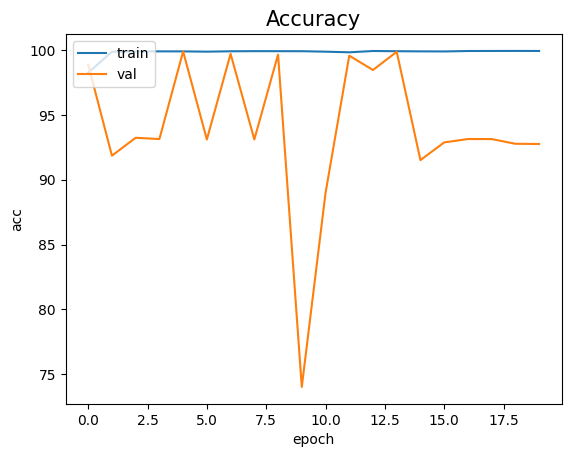

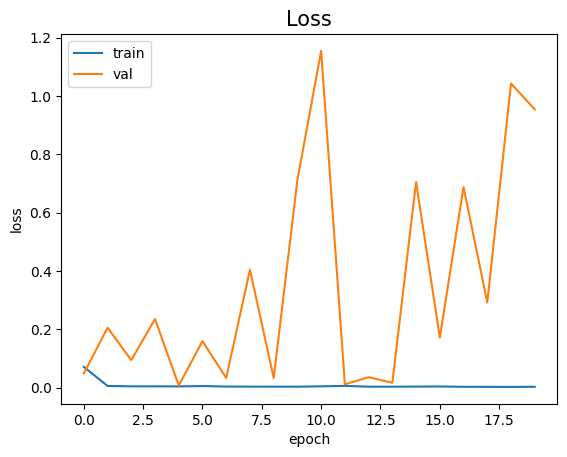

In [ ]:

def plotAcc(acc):
    plt.title("Accuracy",fontsize=15)
    plt.plot(acc['train'])
    plt.plot(acc['val'])
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def plotLoss(loss):
    plt.title("Loss",fontsize=15)
    plt.plot(loss['train'])
    plt.plot(loss['val'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plotAcc(acc)
plotLoss(loss)

In [ ]:
print(list ( new1.children ( ) ))
print(list ( new1.children ( ) ) [ :-2 ])

[Linear(in_features=68, out_features=512, bias=True), Linear(in_features=512, out_features=256, bias=True), Linear(in_features=256, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=32, bias=True), ReLU(), BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Linear(in_features=32, out_features=5, bias=True)]
[Linear(in_features=68, out_features=512, bias=True), Linear(in_features=512, out_features=256, bias=True), Linear(in_features=256, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=32, bias=True), ReLU()]


Epoch [10/20], Training Loss: 0.0103
Epoch [20/20], Training Loss: 0.0051
Training time: 35.12 seconds
Accuracy of the network on train data: 91 %
Accuracy of the network on val data: 84 %


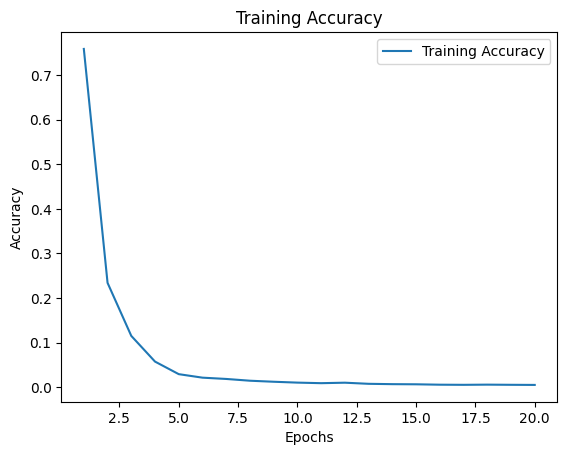

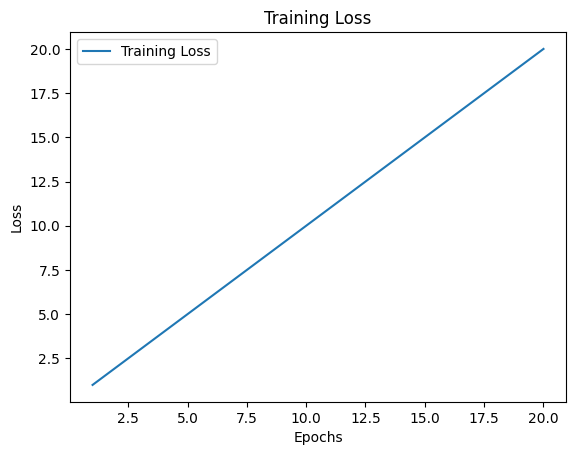

In [ ]:
class BDPDNN2Classification (nn.Module ):
  def __init__ ( self,baseModel,num_class ) :   #For DoS Attacks , num class=6
    super ( BDPDNN2Classification , self ).__init__ ( )
    # self.baseModel = nn.Sequential (* list ( baseModel.children ( ) ) [ :-2 ] )
    self.baseModel = nn.Sequential (* list ( baseModel.children ( ) ) )
    self.batchnorm1new = nn.BatchNorm1d(5)
    self.ReLU = nn.ReLU( )
    self.layer_new_out = nn.Linear(5,num_class)
    torch.nn.init.ones_(self.layer_new_out.bias)
    torch.nn.init.normal_(self.layer_new_out.weight)

  def forward ( self , x ) :
    for name , param in self.baseModel.named_parameters() :
      if name == "0.weight" or name == "0.bias" :
        param.requires_grad = False
      if name == "1.weight" or name == "1.bias" :
          param.requires_grad = False
      if name == "2.weight" or name == "2.bias" :
          param.requires_grad = True
      if name == "3.weight" or name == "3.bias" :
          param.requires_grad = True
      if name == "4.weight" or name == "4.bias" :
        param.requiresgrad = True
    x = self.ReLU(self.batchnorm1new(self.baseModel(x)))
    x = self.layer_new_out(x)
    return x



def predict(model, train_loader, val_loader, num_classes):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    dataloaders = {
        'train': train_loader1,
        'val': val_loader1,
        #'test': test_loader1
    }

    model.eval() # Prepares model for evaluation

    for phase in ['train', 'val']: #'test']:
        correct = 0
        total = 0

        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Accuracy of the network on {phase} data: %d %%' % (
            100 * correct / total))
def plotAcc(acc):
    # Your implementation of the plotAcc function
    plt.figure()
    plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()

def plotLoss(loss):
    # Your implementation of the plotLoss function
    plt.figure()
    plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

def training(model, epochs, train_loader, val_loader, criterion, optimizer, num_classes):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    acc = []
    loss = []

    for epoch in range(epochs):
        model.train()  # Prepares model for training
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss_value = criterion(outputs, labels)
            loss_value.backward()
            optimizer.step()

            running_loss += loss_value.item()

        train_loss = running_loss / len(train_loader)
        acc.append(train_loss)
        loss.append(epoch + 1)

        if epoch % 10 == 9:
            print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss:.4f}')

    return model, acc, loss

num_classes2 = 5 #usb classes
nested3 = BDPDNN2Classification(baseModel=new1, num_class=num_classes2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nested3.parameters(), lr=0.001)
epochs = 20
train_loader1, val_loader1 #data of the new dataset
start_time = time.time()
nested21, acc, loss = training(nested3, epochs, train_loader, val_loader, criterion, optimizer, num_classes2)
end_time = time.time()
elapsed_time = end_time - start_time
print("Training time: {:.2f} seconds".format(elapsed_time))
predict(nested21, train_loader1, val_loader1, num_classes2)
#predict(nested21, train_loader1, val_loader1, test_loader1, num_classes2)
plotAcc(acc)
plotLoss(loss)


In [ ]:
# Print the classification matrix
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nested21 = nested21.to(device)

with torch.no_grad():
    nested21.eval()  # Prepares model for evaluation
    all_labels = []
    all_predictions = []

    for inputs, labels in val_loader1:  # Use your validation dataset
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = nested21(inputs)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.tolist())
        all_predictions.extend(predicted.tolist())

    from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

    cm = confusion_matrix(all_labels, all_predictions)
    cr = classification_report(all_labels, all_predictions)
    accuracy = accuracy_score(all_labels, all_predictions)
    print("Classification Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

Classification Matrix:
[[84881    53    52     5    61]
 [    2 29048     0     0     0]
 [   61  3410  3508     0     0]
 [    0     0     0    35     0]
 [    0 17552     0     1    73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85052
           1       0.58      1.00      0.73     29050
           2       0.99      0.50      0.67      6979
           3       0.85      1.00      0.92        35
           4       0.54      0.00      0.01     17626

    accuracy                           0.85    138742
   macro avg       0.79      0.70      0.67    138742
weighted avg       0.85      0.85      0.80    138742

Accuracy: 84.72%
